# User Acquisition Analysis Workflow

## Purpose

This analysis showcases my approach to tackling a analysis task of comparing different user cohorts, in an effort to find the best user acquisition channel. The aim is to demonstrate an approach, which allows for detecting subtle differences between the user cohorts, allows for forecasting the eventual value of each cohort, and delivers tangible value, as the more valuable channel can be identified and levaraged early


## Task

To identify early the differences in value between 2 user cohorts acquired from 2 competing user acquisition channels, and subsequently leverage the more valuable channel by investing the resources gained from divesting the less valuable channel.

<details>
<summary> <strong>[Click to expand] >></strong> Premise, task, and disclaimers (longer version) <strong><< [Click to expand]</strong> </summary>

### Premise

This analysis assumes a digital product or service, and focuses on user acquisition through digital channels where user attribution is straightforward. The basic premise of this analysis is best described as freemium game or other similar entertainment produc/service, but the approach can be applied with slight modifications to e.g. e-commerce shopping, professional use software, etc.

Essentially the business model should rely on acquiring user, who will then engange with the product, and spend money on in app purchases, or purchase licenses or subscriptions, or buy products from shop. Different kind of users will have a different spending profile, which will be more or less linked to their other behavior on the platform.

It is also assumed, that there is historical data from which the spending pattern of different user clusters can be reasonably well projected. This assumes that the product has history and the business is not treading a new path, which would be case in e.g. after launching completely new product or vertical, entering a vastly different new market, or experiencing substantial growth and expanding outside of a niche market into more general market position. Also it is assumed that there is historical data where the fundamental way of users engaging with the product and spending money is similar to current and near future situation. This means that no comprehensive changes in e.g. pricing, product structure, or business logic has been made. In case of a game or similar entertainment product it is assumed that there has not been substantial changes in game design or other engagement factors, which would alter the way how users both act when using the product, and how that activity is linked to spending profile. In short, for the purpose of this excercise, it is possible to draw valid conclusions about future based on historical data as far as user activity and spending predictions are concerned.


### Task

There is ongoing intiative comparing 2 user acquisition channels. The chosen metric to compare these 2 channels is the net value per user at 90 days after install. That is calculated as 90d Lifetime value per user - Cost per Acquisition.

The cutoff point of the comparison is chosen at 90 days, since after that there are too many uncertainties to warrant the assumption that the user behavior and value would be driven primarily by the user acquisition channel through which they have been acquired. After that the overall experience on the platform, possible reactivation campaigns, or changes in personal situation will likely influence the predicted value of the user more than the user acquisition channel. Moreover, there might be other changes in e.g. product and/or business logic, game design, or meta in case there is multiplayer component to the product.

The specific metrics will be properly displayed and visualized in the analysis proper part, but a preliminary situation is that the campaign has ran for so long that there is 30 days worth of user activity data for about 10000 acquired users in both channels. The CPA for both channels is roughly similar, and so is the 30 day LTV per user. However, there is a sense that there might be some critical differences in the profitability potential between the 2 cohorts. The task is to conclusively decide which channel to discontinue in order to leverage the more profitable channel as early as possible, to minimize the opprtunity cost incurred by running inefficient user acquisition channels.


### Disclaimers

While the scenario, high level figures, and other realities of this excercise are based on the real world experiences of the creator of this analysis example, the data is purely made up for the purpose of demonstration. This analysis or the dataset used here does not yield any strategic or operative insights on the businesses of any previous or current employer of the creator, nor any other real world company with which the creator might hav worked with through his career.

This also means that the data used in this excercise is simplified in nature compared to real world user data. The asusmptions in this excercise, e.g. boundaries between different user clusters, or the predictability of the user spending profiles, or the link between 30 day user activity and 90 day spending profile might not be as clear in real life as presented here. Thus, this analysis should not be taken as "ready to implement turnkey solution" to solving real world user acquisition value prediction tasks, but more as an example of the approach and knowledge basis of the creator of this example. In real world the actual solutions will be built on top of this foundation case by case, with modifications and additions to the approach applied as the situation necessitates.

Moreover, the creator is first and foremost a full stack data analyst, whose expertise lies in designing, building, and executing analysis pipelines, from problem statement and metric definition, through data pipeline and analysis tool development, to presenting and visualizing the results in a way which drives decision making creating measurable business impact and value. This means that the creator is not professional python developer. The creator's philosophy is to use python as tool to get things done and deliver impactful business insights. Thus, the code might contain unoptimized parts, or occasionally an approach is taken, which is considered to not adhere to the best practices by professional python developer community. When applying this (or similar approach) in production, the creator would prefer to build the analysis by using SQL and a professional BI tool, and would refine many parts of this code if the application is necessary to do with python.
</details>


## Code Setup

In [12]:
## Importing all necessary modules and libraries

import os
import utils.generate_dataset as generate
import utils.auxiliaries as aux

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt



<details>
<summary> Code Setup (longer explanation) </summary>

Here we import all necessary libraries and modules for this analysis workflow. I have implemented most of the actual code that is doing the analysis in several modules, which are part of this project in subrepositories. This workflow will mainly concern the analysis approach and methods, with each step explained primarily focusing on key takeaways and business implications. The more technical details in the code are not intended to be the focus of this excercise, but can be freely studied from the code modules.
</details>

In [2]:
def select_table_sqlite(query: str, db_path: str="demo_database.db") -> pd.DataFrame:
    """
    Executes the provided SQL query on the SQLite database located at db_path
    and returns the result as a pandas DataFrame.

    :param query: SQL query to be executed
    :param db_path: Path and name of the local SQLite database
    :return: Table selected by the query as Pandas Dataframe
    """
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df


def execute_sql_raw_sqlite(query: str, db_path: str="demo_database.db") -> str:
    """
    Executes a non-query SQL command (e.g., DROP TABLE) on the specified SQLite database.
    Returns a message indicating whether the command was executed successfully.
    """
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        cursor.execute(query)
        conn.commit()
        return f"Executed: {query}"
    except Exception as e:
        return f"An error occurred: {e}"
    finally:
        conn.close()


def df_to_sqlite_db(df: pd.DataFrame, table_name: str, db_path: str='demo_database.db'):
    conn = sqlite3.connect(db_path)
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    conn.commit()
    conn.close()
    print(f"DataFrame uploaded as table {table_name} in {db_path}.")


DataFrame uploaded as table fct_user_action_test in demo_database.db.


,time_since_install_seconds,cum_transactions,total_ltv_per_user,time_since_install
0,148,12.0,0.012,0 days 00:02:28
1,159,13.0,0.013,0 days 00:02:39
2,204,14.0,0.014,0 days 00:03:24


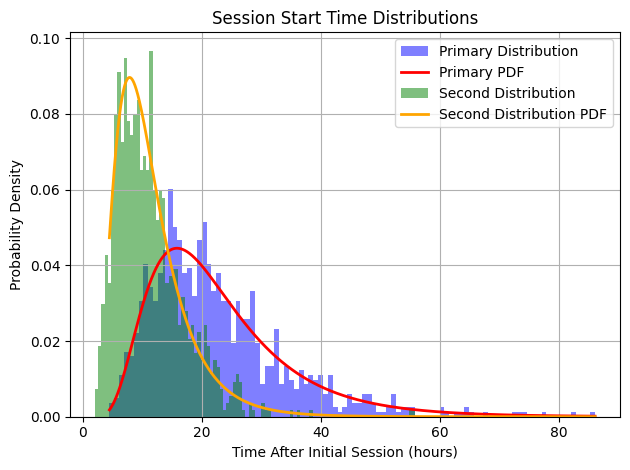

In [3]:
# Workflow

## Balanced (8,6,6%)
shares = {
    'a': 0,
    'b': 8,
    'c': 6,
    'd': 6,
    'e': 0,
    'f': 0,
    'g': None,
}

df = generate.generate_dataset(cluster_shares=shares, size=1000, start_date='2024-01-01')

table_name = "fct_user_action_test"

# Create the table
df_to_sqlite_db(df, table_name, db_path='demo_database.db')

df_c = select_table_sqlite(generate.analysis_query(table_name), 'demo_database.db')

df_c['time_since_install'] = pd.to_timedelta(df_c['time_since_install_seconds'], unit='s')

aux.display(df_c.head(3))
#aux.plot_ltv_over_time(df_c, time_column='time_since_install')

avg = aux.plot_session_start_distribution(initial_timestamp='2024-01-01 00:00:00',
                                mu=11.2,
                                sigma=0.5,
                                num_samples=1000,
                                time_unit='hours',
                                second_mu=10.5,
                                second_sigma=0.5
                                )


In [4]:
display(df)

,user_id,session_id,session_start,session_length,session_end,original_cluster,session_start_cluster,session_end_cluster,action_id,action_timestamp,transaction_size,running_session_number
0,0,None,NaT,NaN,NaT,b,None,None,install,2024-01-11 07:22:17.000000000,NaN,<NA>
1,0,0-0,2024-01-11 07:22:47.000000000,3718.679317,2024-01-11 08:24:45.679317338,b,b,b,session_start,2024-01-11 07:22:47.000000000,NaN,0
2,0,0-1,2024-01-14 19:38:24.627603983,5015.899931,2024-01-14 21:02:00.527535107,b,b,b,session_start,2024-01-14 19:38:24.627603983,NaN,1
3,0,0-1,2024-01-14 19:38:24.627603983,5015.899931,2024-01-14 21:02:00.527535107,b,b,b,transaction,2024-01-14 20:20:12.577569545,20.0,1
4,0,0-2,2024-01-21 12:26:52.426941962,5362.106934,2024-01-21 13:56:14.533876284,b,b,b,session_start,2024-01-21 12:26:52.426941962,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
35121,847,847-43,2024-04-20 00:42:53.882874526,1583.479436,2024-04-20 01:09:17.362310873,g,g,g,session_start,2024-04-20 00:42:53.882874526,NaN,43
35122,847,847-44,2024-04-20 20:16:52.282771787,1643.815576,2024-04-20 20:44:16.098347650,g,g,g,session_start,2024-04-20 20:16:52.282771787,NaN,44
35123,847,847-45,2024-04-21 19:54:28.102100192,884.029879,2024-04-21 20:09:12.131978734,g,g,g,session_start,2024-04-21 19:54:28.102100192,NaN,45
35124,847,847-46,2024-04-28 17:24:19.815796328,1360.553656,2024-04-28 17:47:00.369452152,g,g,g,session_start,2024-04-28 17:24:19.815796328,NaN,46


In [35]:
def plot_helper(
        df: pd.DataFrame,
        x_col: str,
        x_agg: str,
        y1_col: str,
        y1_func: str,
        y1_cum: bool,
        y1_plottype: str,
        y1_label: str=None,
        y1_color: str=None,
        y2_incl: bool=False,
        y2_col: str=None,
        y2_func: str=None,
        y2_cum: bool=False,
        y2_plottype: str=None,
        y2_label: str=None,
        y2_color: str=None,
    ):
    """
    x_agg: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases
    y1_func, y2_func: https://pandas.pydata.org/docs/reference/groupby.html#dataframegroupby-computations-descriptive-stats

    func_map = {
        "count": "count",
        "sum": "sum",
        "mean": "mean"
    }
    y_series = df.groupby(x_agg)[y_col].agg(func_map[y_func])

    """
    # Ensure the timestamp column is in datetime format
    print(df[x_col].head())
#    df[x_col] = pd.to_datetime(df[x_col], infer_datetime_format=True)#, errors='coerce')
    df[x_col] = pd.to_datetime(df[x_col], format='mixed', dayfirst=False)

    #try:
    #    df[x_col] = pd.to_datetime(df[x_col])
    #except ValueError as e:
    #    raise(f'x_col could not be converted to datetime, {e}')
    
    display(df)

    df[x_agg] = df[x_col].dt.floor(x_agg)
    y1_series = df.groupby(x_agg)[y1_col].agg(y1_func)

    # Create the plot with two y-axes.
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot primary series as a bar chart on ax1.
    ax1.bar(y1_series.index, y1_series.values, 
            color=y1_color if y1_color is not None else 'skyblue', alpha=0.7, label=y1_label)
    ax1.set_xlabel(f'Time ({x_agg})')
    ax1.set_ylabel(y1_func, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    plt.title('Hourly Aggregation: Count (Bar) and Cumulative Sum (Line)')
    plt.tight_layout()
    plt.show()

#air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
#   ....:     kind='bar', rot=0, ax=axs
#   ....: )


,session_id,session_start,session_transactions
0,0-0,2024-01-21 23:15:47,0.0
1,0-1,2024-01-22 12:54:39.465186,0.0
2,0-2,2024-01-23 14:54:29.568994,0.0
3,0-3,2024-01-24 12:47:31.393335,0.0
4,0-4,2024-04-26 19:21:08.073225,0.0
...,...,...,...
31820,999-3,2024-01-19 07:05:54.357945,0.0
31821,999-4,2024-01-20 15:57:26.020655,0.0
31822,999-5,2024-01-21 22:00:30.186810,0.0
31823,999-6,2024-01-22 21:53:35.241814,0.0


0           2024-01-21 23:15:47
1    2024-01-22 12:54:39.465186
2    2024-01-23 14:54:29.568994
3    2024-01-24 12:47:31.393335
4    2024-04-26 19:21:08.073225
Name: session_start, dtype: object


,session_id,session_start,session_transactions
0,0-0,2024-01-21 23:15:47.000000,0.0
1,0-1,2024-01-22 12:54:39.465186,0.0
2,0-2,2024-01-23 14:54:29.568994,0.0
3,0-3,2024-01-24 12:47:31.393335,0.0
4,0-4,2024-04-26 19:21:08.073225,0.0
...,...,...,...
31820,999-3,2024-01-19 07:05:54.357945,0.0
31821,999-4,2024-01-20 15:57:26.020655,0.0
31822,999-5,2024-01-21 22:00:30.186810,0.0
31823,999-6,2024-01-22 21:53:35.241814,0.0


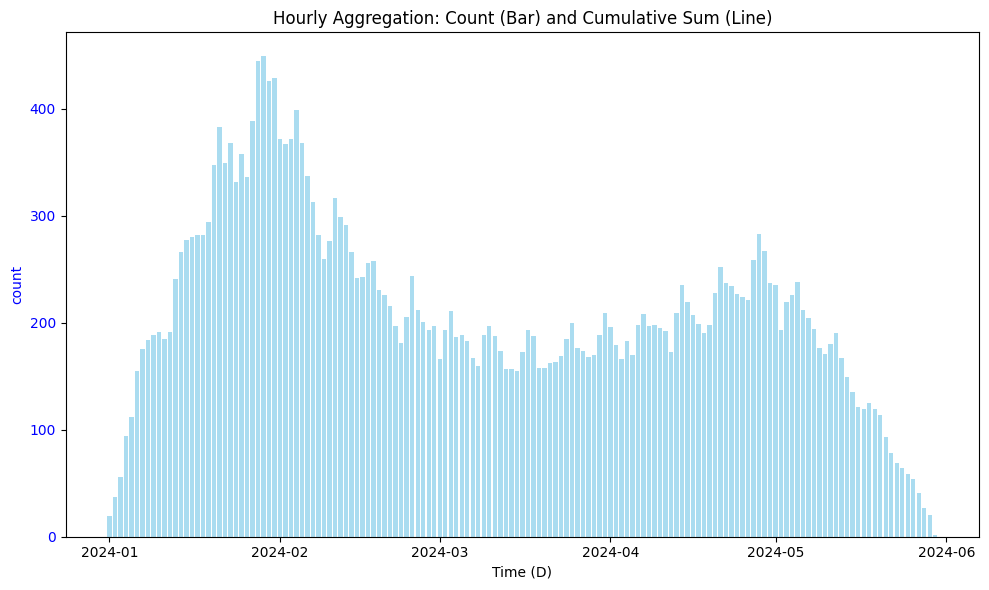

In [36]:
df_c = select_table_sqlite(
    """
    with
    
    transactions_per_session as (
        select
            session_id,
            session_start,
            sum(case when transaction_size is NULL then 0 else transaction_size end) as session_transactions
        from fct_user_action_test
        where session_id is not null
        group by 1, 2
    )
    select * from transactions_per_session
    """
)
display(df_c)
plot_helper(df_c, 'session_start', 'D', 'session_id', 'count', False, 'bar')